In [28]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
GOOGLE_DRIVE_PATH = '/content/drive/MyDrive/PersonalProjects/SalesDataAnalysis'

# Identify path to zipped dataset
zip_path = os.path.join(GOOGLE_DRIVE_PATH, 'sales.zip')
# Copy it to Colab
!cp '{zip_path}' .
# Unzip it (removing useless files stored in the zip)
!yes|unzip -q sales.zip
# Delete zipped version from Colab (not from Drive)
!rm sales.zip

In [6]:
df=pd.read_excel('Online Retail.xlsx')
df=pd.DataFrame(df)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [22]:
# statistics for numerical variables
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [21]:
# statistics for categorical variables
df.describe(include=object)

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


**Inferences**
- Quantity:
  - The average quantity of products per transaction is approximately 9.55.
  - There is a wide range in quantity, from a minimum of -80,995 to a maximum of 80,995.
  - The standard deviation is large, indicating significant variability in the data. The substantial difference between the maximum value and the 75th percentile also suggests the presence of outliers.
- Unit Price:
  - The average unit price of products is around 4.61.
  - The unit price ranges from -11,062.06 to 38,970, suggesting errors or noise in the data since negative prices are not logical.
  - Similar to the Quantity column, a large difference between the maximum value and the 75th percentile indicates the presence of outliers.
- Customer ID:
  - There are 406,829 non-null entries, indicating missing values in the dataset that need to be addressed.
  - Customer IDs range from 12,346 to 18,287, which helps in identifying unique customers.
- Invoice Number:
  - There are 25,900 unique invoice numbers, indicating 25,900 separate transactions.
  - The most frequent invoice number is 573585, appearing 1,114 times, possibly representing a large transaction or an order with multiple items.
- Stock Code:
  - There are 4,070 unique stock codes representing different products.
  - The most frequent stock code is 85123A, appearing 2,313 times in the dataset.
- Description:
  - There are 4,223 unique product descriptions.
  - The most frequent product description is "WHITE HANGING HEART T-LIGHT HOLDER," appearing 2,369 times.
  - This column has some missing values that need to be treated.
- Country:
  - Transactions come from 38 different countries, with the majority (approximately 91.4%) originating from the United Kingdom.


In [18]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

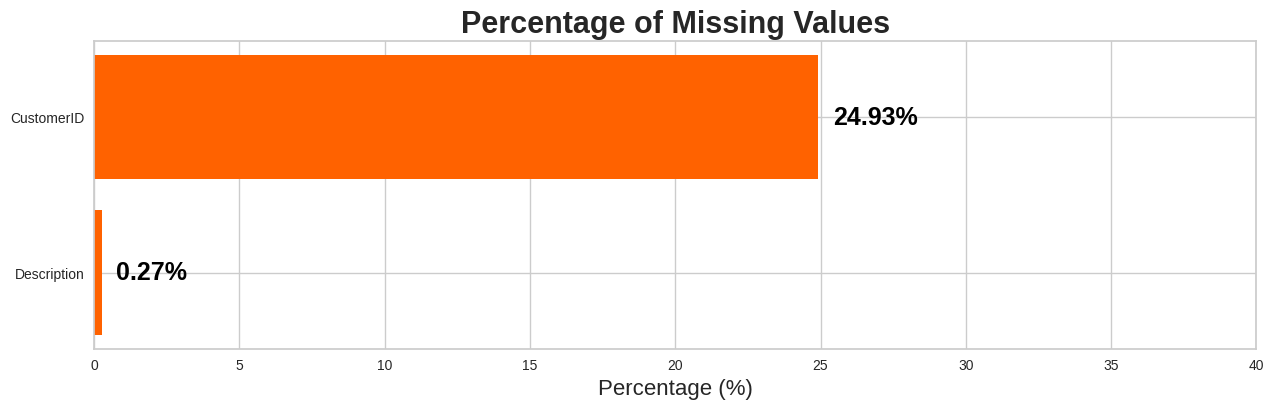

In [26]:
# Calculate the percentage of missing values in each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / len(df)) * 100

# Sort the missing percentages in ascending order
missing_percentage = missing_percentage.sort_values(ascending=True)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Add annotations for each bar
for i, (percentage, column) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(percentage + 0.5, i, f"{percentage:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set the limit for the x-axis
ax.set_xlim([0, 40])

# Add a title and label for the x-axis
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentage (%)', fontsize=16)
plt.show()


**Handling Missing Values Strategy:**

- CustomerID (24.93% missing):
With nearly 25% missing data, imputing CustomerID values could introduce significant bias. As this column is crucial for clustering and recommendations, it's best to remove rows with missing CustomerIDs to maintain data integrity.

- Description (0.27% missing):
Although the missing data is minimal, there are inconsistencies where the same StockCode has different Descriptions. Imputing based on StockCode might propagate errors. Therefore, removing rows with missing Descriptions ensures data quality.

By eliminating rows with missing CustomerID and Description values, we aim to create a cleaner, more reliable dataset for accurate clustering and effective recommendations.


In [7]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['CustomerID', 'Description'])

In [8]:
# Verifying the removal of missing values
df.isnull().sum().sum()

0

In [9]:
# Identifying all instances of duplicate rows
duplicates = df[df.duplicated(keep=False)]

# Sorting the duplicates by specific columns to observe them together
sorted_duplicates = duplicates.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Showing the first 10 duplicate records
sorted_duplicates.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom


**Handling Duplicates Strategy:**
Completely identical rows, including transaction times, likely indicate data recording errors. Retaining these duplicates can introduce noise and inaccuracies. Therefore, I will remove these duplicates to ensure a cleaner dataset, leading to more accurate customer clusters and a precise recommendation system.

In [10]:
# Counting and displaying the number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"There are {duplicate_count} duplicate rows in the dataset.")

# Removing the duplicate rows
df.drop_duplicates(inplace=True)


There are 5225 duplicate rows in the dataset.


In [11]:
# Create a new column 'Transaction_Status' based on whether InvoiceNo starts with "C"
import numpy as np
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')


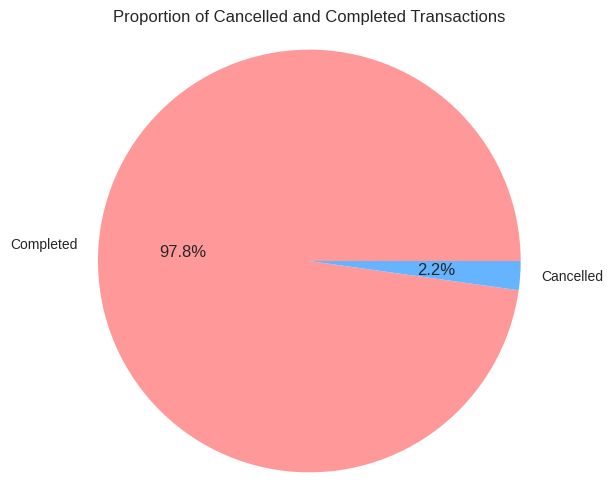

In [34]:
# Count the number of transactions by 'Transaction_Status'
status_counts = df['Transaction_Status'].value_counts()

# Plotting the proportion of cancelled and completed transactions
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Proportion of Cancelled and Completed Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [35]:
# Calculate the number of unique stock codes
unique_stock_codes = df['StockCode'].nunique()

# Output the count of unique stock codes
print(f"There are {unique_stock_codes} unique stock codes in the dataset.")


There are 3684 unique stock codes in the dataset.


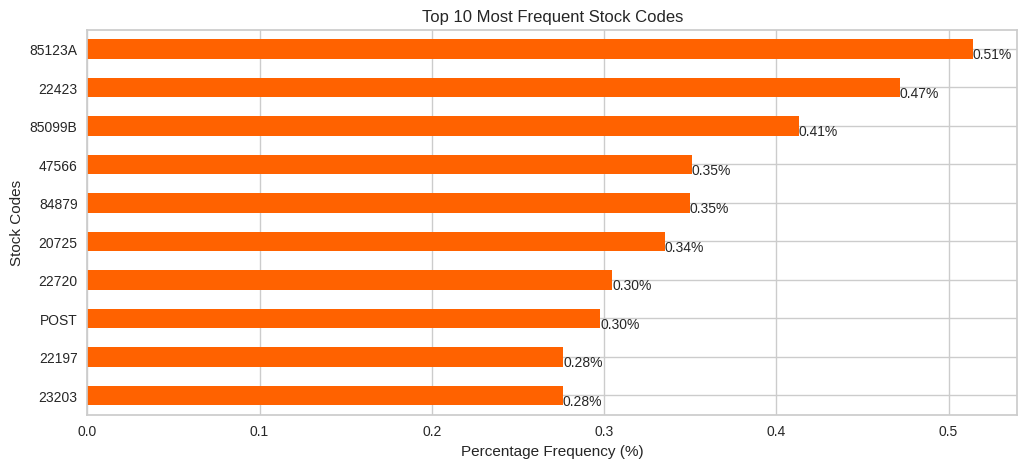

In [36]:
# Calculate the top 10 most frequent stock codes as a percentage
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Visualize the top 10 most frequent stock codes
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')

# Display the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()


**Inferences on Stock Codes:**

- Product Diversity: The dataset encompasses 3,684 unique stock codes, reflecting a wide array of products offered by the online retail store. This diversity may facilitate the identification of distinct customer segments based on preferences for various product types.

- Popular Products: Examining the top 10 most frequently occurring stock codes provides valuable insights into the popular products or categories frequently purchased by customers.

- Most stock codes consist of 5 or 6 characters, but there are anomalies like 'POST' seen in the top 10 stock codes

In [37]:
df['UnitPrice'].describe()

count    401604.000000
mean          3.474064
std          69.764035
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

The minimum value of Unit Price is 0, which indicated either free items or data entry error. To understand their nature, it is essential to investigate these zero unit price transactions further.

In [40]:
df[df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,40.000000
mean,347.100000
min,1.000000
25%,1.000000
50%,4.500000
75%,24.000000
max,12540.000000
std,1978.311813


**Handling Zero Unit Price Transactions:**

There are only 40 transactions with a unit price of zero. Due to their limited number and potential to disrupt data analysis, the recommended approach is to exclude these transactions from the dataset.

In [12]:
# Filtering out records where the unit price is greater than zero to ensure data accuracy
df = df[df['UnitPrice'] > 0]


**Data Cleaning**

In [13]:
# Remove negative Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Add a column for total price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


## **EDA**

In [48]:
df.set_index('InvoiceDate', inplace=True)
monthly_sales = df['TotalPrice'].resample('M').sum()

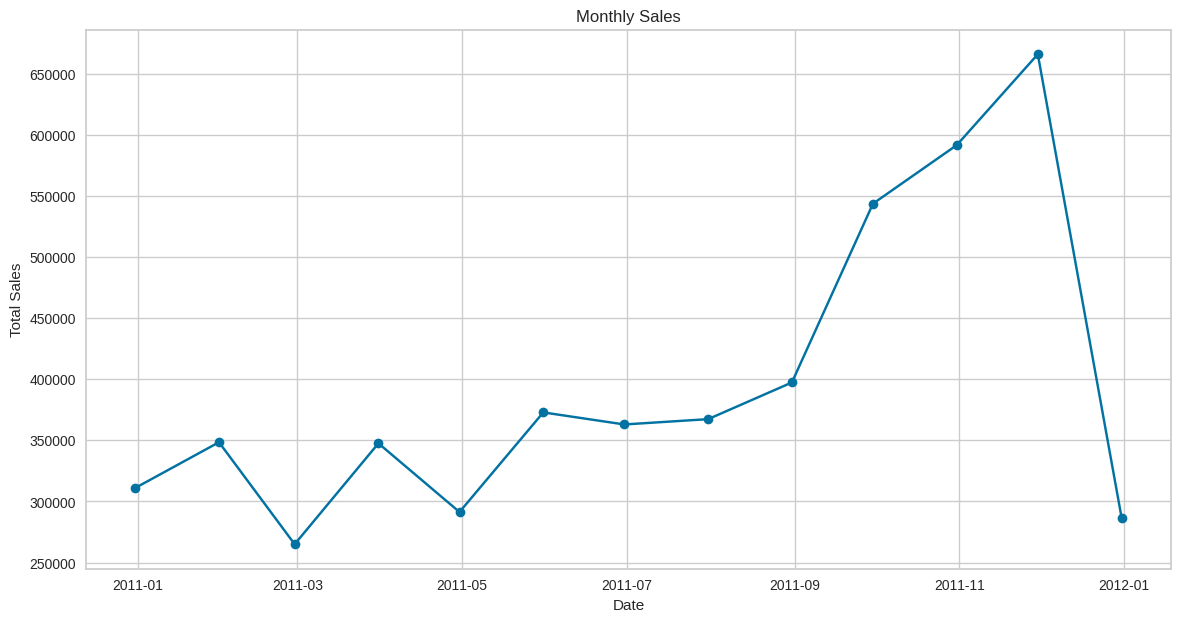

In [29]:
# Plot monthly sales
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

The monthly sales plot shows a seasonal pattern with peaks and troughs, indicating that sales vary throughout the year.

**Top Products**

In [20]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

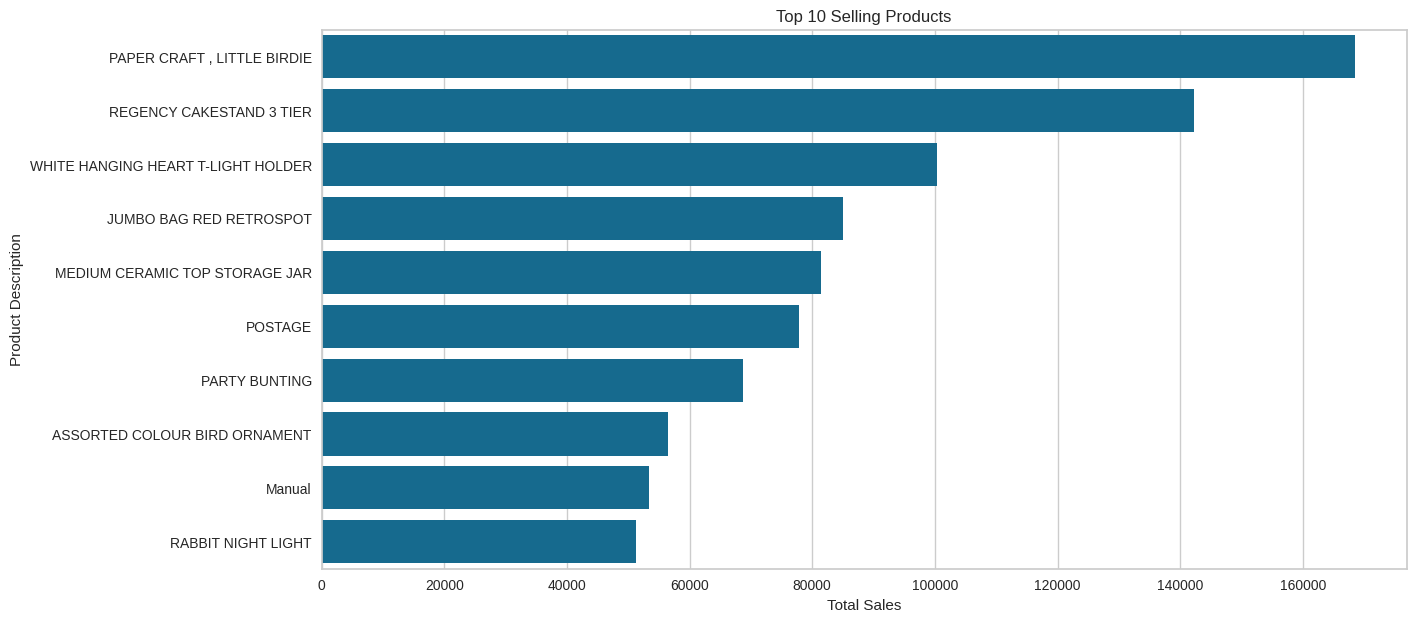

In [21]:
# Plot top selling products
plt.figure(figsize=(14, 7))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.show()

The bar plot highlights the top 10 selling products, indicating their popularity. It is recommended to prioritize inventory management and marketing efforts for these items.

**Sales By Country**

In [22]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

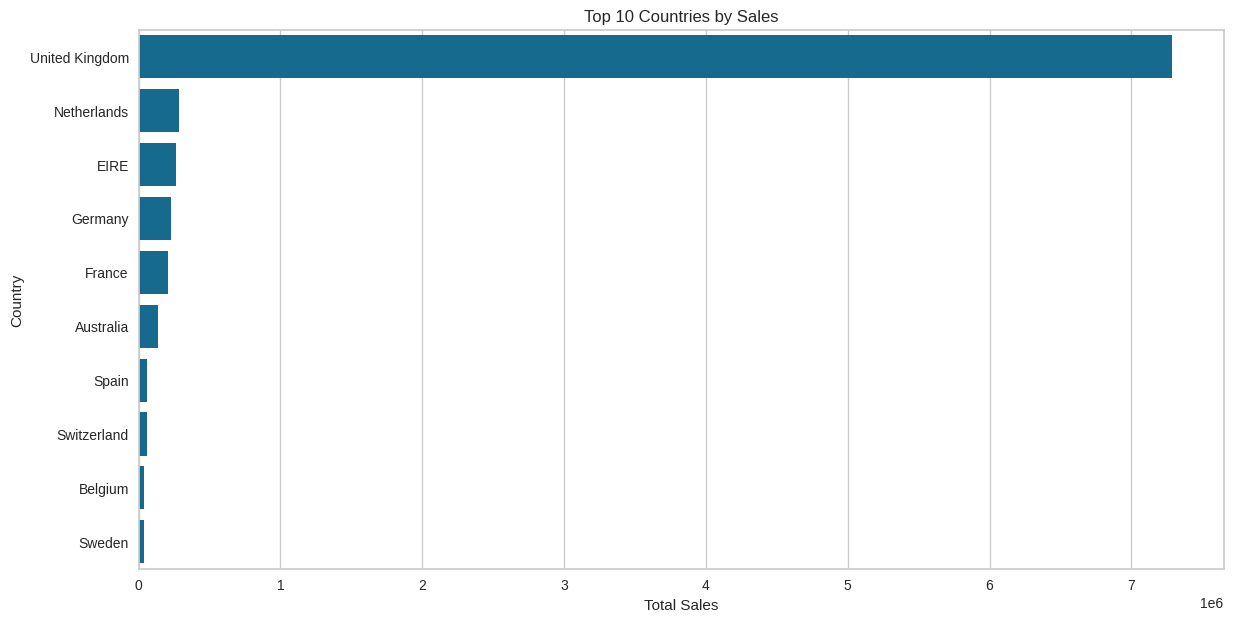

In [23]:
# Plot sales by country
plt.figure(figsize=(14, 7))
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title('Top 10 Countries by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

The bar plot illustrates the top 10 countries by sales, with the UK notably leading and accounting for the majority of profits, which aligns with the company's UK base. Additionally, the Netherlands, Ireland, Germany, and France emerge as top-performing international markets, indicating a strong customer presence in Europe.

In [15]:
customer_sales = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)

In [16]:
# Basic statistics on customer sales
customer_sales.describe()

count      4338.000000
mean       2048.688081
std        8985.230220
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: TotalPrice, dtype: float64

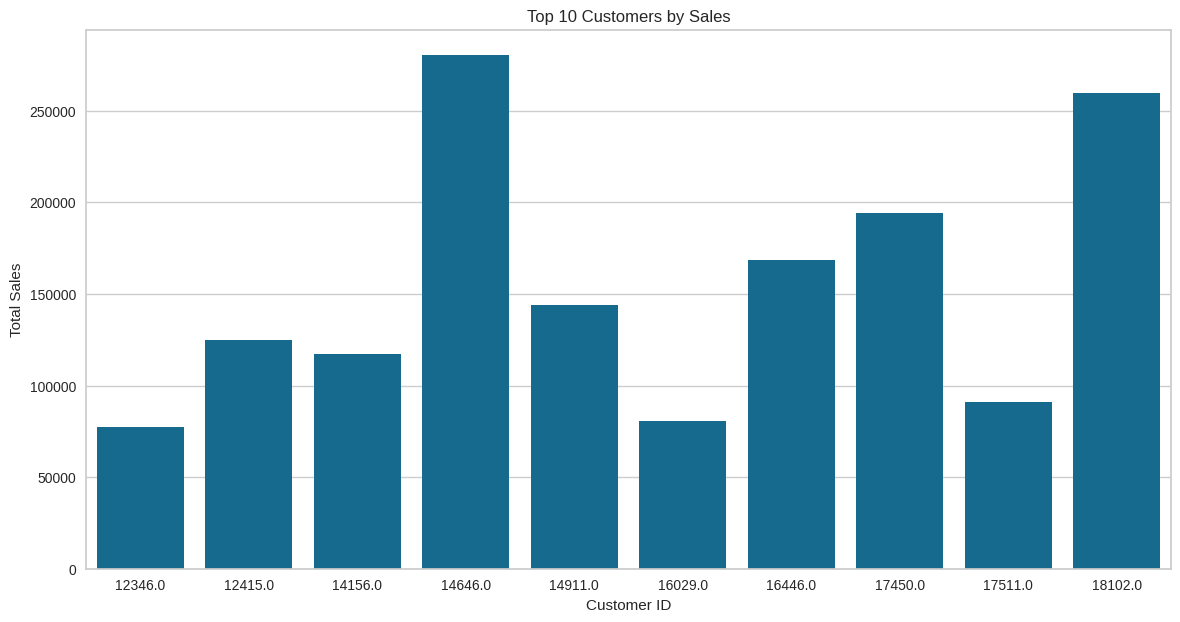

In [17]:
# Plot top customers
plt.figure(figsize=(14, 7))
sns.barplot(y=customer_sales.head(10).values, x=customer_sales.head(10).index)
plt.title('Top 10 Customers by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Customer ID')
plt.show()


These top customers exhibit exceptionally high sales figures compared to the mean of 2054 and median of just 674. This disparity indicates distinct customer groups with varying purchasing behaviors.

In [24]:
print("Summary of Findings:")
print(f"Total Sales: {df['TotalPrice'].sum()}")
print(f"Total Transactions: {len(df)}")
print(f"Top Selling Product: {top_products.index[0]} with sales of {top_products.values[0]:.2f}")
print(f"Top Customer: {customer_sales.index[0]} with sales of {customer_sales.values[0]:.2f}")
print(f"Top Country: {country_sales.index[0]} with sales of {country_sales.values[0]:.2f}")

Summary of Findings:
Total Sales: 8887208.894
Total Transactions: 392692
Top Selling Product: PAPER CRAFT , LITTLE BIRDIE with sales of 168469.60
Top Customer: 14646.0 with sales of 280206.02
Top Country: United Kingdom with sales of 7285024.64
